<a href="https://colab.research.google.com/github/esther-nyokabi/Mchezo-Pesa-Ltd/blob/main/Mchezopesa_Group_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Understanding**





### a) **Understanding the Context**

The FIFA Men's World Ranking is a ranking system for men's national teams in association football. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992.

A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. It is called the Elo rating system.

Elo ratings are a numerical way to rank the skill level of various competitors based on their performance as well as the relative skill level of their opponents. The idea is that beating a tougher opponent should give you more points than beating an easier opponent.

The study is meant to predict the number of scores made by both the away team and home teams.


### b) **Defining the Question**

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.
A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



### c) **Defining the Metric for Success**


The research will be viewed and deemed successful if the model could make a prediction of at least 80%.


### d) **Recordning the Experiments Design**

* Load data and preview preliminary characteristics
* Read the data
* Perform Data Cleaning & Merge the data (check for and deal with outliers, anomalies and missing data)
* Petform Exploratory Data Analysis
* Implementing the Solution
* Challenging the Solution
* Follow Up Questions



# **Reading the Data** 

Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression # For use in Logistic regression
from sklearn.preprocessing import PolynomialFeatures # For use in polynomial regression
from sklearn.preprocessing import LabelEncoder # For encoding purposes
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt


In [ ]:
ranking = pd.read_csv('/content/fifa_ranking.csv')
results = pd.read_csv('/content/results.csv')
ranking.head(5)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


###**Fifa_ranking Dataset**

In [ ]:
# Preview the Head part of the data
ranking.head(15)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
# Preview the tail part of the data
ranking.tail(15)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57778,197,Djibouti,DJI,31.88,27,1,0.0,0.0,63.75,31.88,0.00,0.00,0.00,0.00,CAF,2018-06-07
57779,197,Samoa,SAM,31.88,38,-6,0.0,0.0,0.00,0.00,106.25,31.88,0.00,0.00,OFC,2018-06-07
57780,199,US Virgin Islands,VIR,17.60,18,0,0.0,0.0,0.00,0.00,0.00,0.00,87.98,17.60,CONCACAF,2018-06-07
57781,200,Sri Lanka,SRI,16.76,17,0,0.0,0.0,8.50,4.25,25.50,7.65,24.29,4.86,AFC,2018-06-07
57782,201,Pakistan,PAK,10.17,10,2,0.0,0.0,0.00,0.00,0.00,0.00,50.83,10.17,AFC,2018-06-07
57783,202,Cayman Islands,CAY,8.50,9,2,0.0,0.0,0.00,0.00,0.00,0.00,42.50,8.50,CONCACAF,2018-06-07
57784,203,San Marino,SMR,7.92,8,2,0.0,0.0,0.00,0.00,0.00,0.00,39.60,7.92,UEFA,2018-06-07
57785,204,British Virgin Islands,VGB,4.25,4,2,0.0,0.0,0.00,0.00,0.00,0.00,21.25,4.25,CONCACAF,2018-06-07
57786,204,Montserrat,MSR,4.25,17,-4,0.0,0.0,0.00,0.00,0.00,0.00,21.25,4.25,CONCACAF,2018-06-07
57787,206,Turks and Caicos Islands,TCA,0.00,13,-4,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,2018-06-07


In [ ]:
# Determine the number of records in our dataset
ranking.shape

(57793, 16)

In [ ]:
# Lets get the names of the columns in the data
ranking.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
# Check the details of the Dataset(mode,median,mean)
ranking.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


###**Results Dataset**

In [ ]:
# Preview the Head part of the dataset
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Preview the tail part of the dataset
results.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40829,2019-07-16,India,Syria,1,1,Intercontinental Cup,Ahmedabad,India,False
40830,2019-07-17,Tunisia,Nigeria,0,1,African Cup of Nations,Cairo,Egypt,True
40831,2019-07-18,Papua New Guinea,Tonga,8,0,Pacific Games,Apia,Samoa,True
40832,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Apia,Samoa,False
40833,2019-07-18,New Caledonia,Tuvalu,11,0,Pacific Games,Apia,Samoa,True
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Determine the number of records in our dataset
results.shape

(40839, 9)

In [ ]:
# Lets get the names of the columns in the data
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
# Check the details of the Dataset(mode,median,mean)
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# **External Data Source Validation**

FIFA Men's World Ranking : https://en.wikipedia.org/wiki/FIFA_Men%27s_World_Ranking

Current Fifa World Rankings: https://www.fifa.com/fifa-world-ranking/men?

Elo rating system : https://en.wikipedia.org/wiki/Elo_rating_system

# **Data Cleaning**


####**Check for outliers and anomalies within the datasets.**

In [ ]:
# Check for null values in the fifa_ranking dataset
ranking.isnull().any()

rank                       False
country_full               False
country_abrv               False
total_points               False
previous_points            False
rank_change                False
cur_year_avg               False
cur_year_avg_weighted      False
last_year_avg              False
last_year_avg_weighted     False
two_year_ago_avg           False
two_year_ago_weighted      False
three_year_ago_avg         False
three_year_ago_weighted    False
confederation              False
rank_date                  False
dtype: bool

In [ ]:
# Check for null values in the results dataset
results.isnull().any()

date          False
home_team     False
away_team     False
home_score    False
away_score    False
tournament    False
city          False
country       False
neutral       False
dtype: bool

In [ ]:
# Check for duplicates in both datasets 
# Checking for duplicates in the fifa_rankings dataset
ranking.duplicated().sum()

37

In [ ]:
# Checking for duplicates in the results dataset
results.duplicated().sum()

0

In [ ]:
# Dealing with the Duplicate Data
# They are few entries that are duplicates so we can procceed to drop them
ranking = ranking.drop_duplicates()

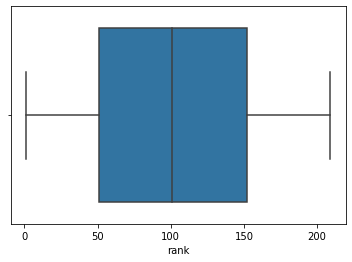

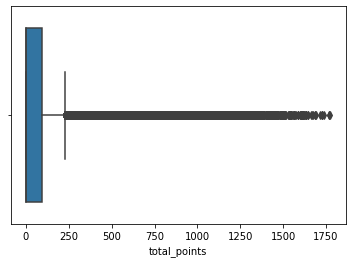

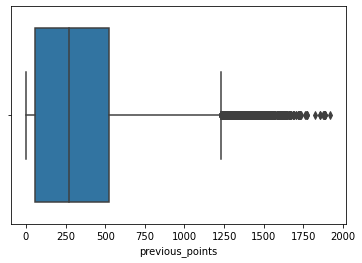

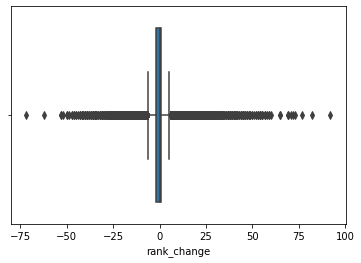

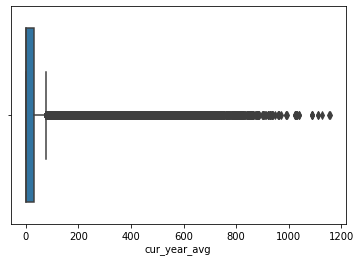

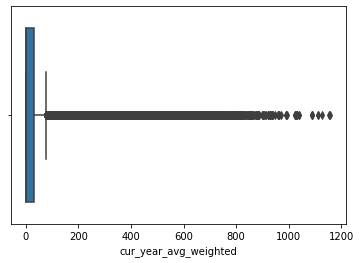

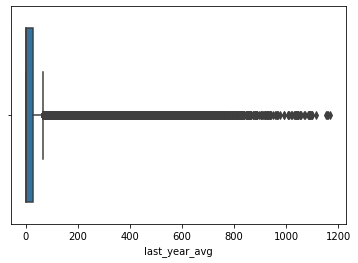

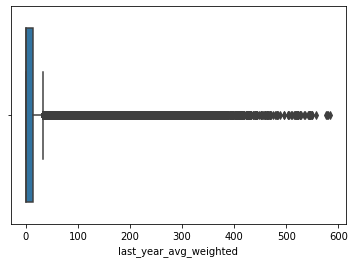

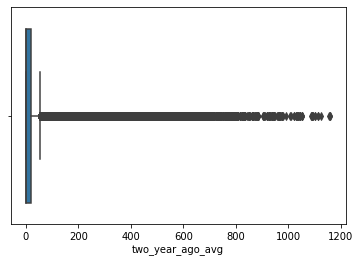

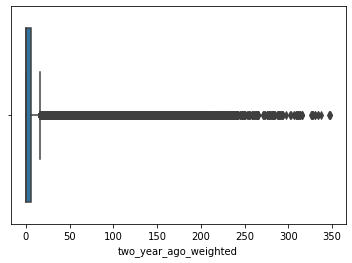

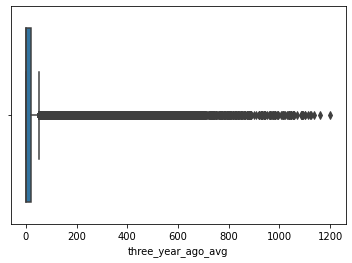

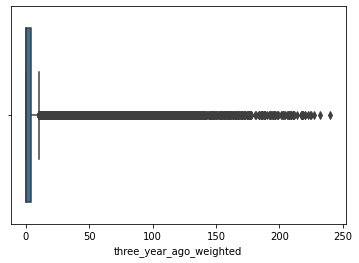

In [ ]:
# Lets plot boxplots and check for outliers for the fifa_rankings columns.
newcol = (ranking[['rank','total_points','previous_points','rank_change','cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted','two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted']])

for column in newcol:
    plt.figure()
    sns.boxplot(x=newcol[column])

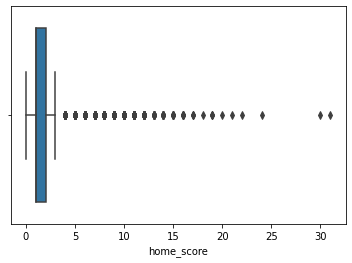

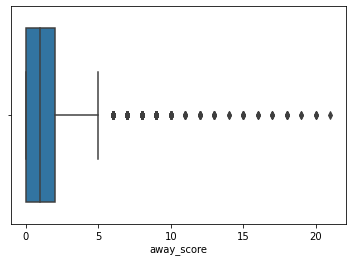

In [ ]:
# Lets plot boxplots and check for outliers for the results columns.
results_col=(results[['home_score','away_score']])

for column in results_col:
  plt.figure()
  sns.boxplot(x=results_col[column])

In [ ]:
#dropping the years prior to 1993 and after 2018 to retain the same time period for both datasets
tresults=results.loc[(results["date"] > '1993-08-01') & (results["date"]< '2018-06-07')]
tresults

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
17914,1993-08-07,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,Ivory Coast,True
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
17917,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
17918,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False
...,...,...,...,...,...,...,...,...,...
39815,2018-06-06,Czech Republic,Nigeria,1,0,Friendly,Schwechat,Austria,True
39816,2018-06-06,Belgium,Egypt,3,0,Friendly,Brussels,Belgium,False
39817,2018-06-06,Belarus,Hungary,1,1,Friendly,Brest,Belarus,False
39818,2018-06-06,Zambia,Madagascar,1,0,COSAFA Cup,Polokwane,South Africa,True


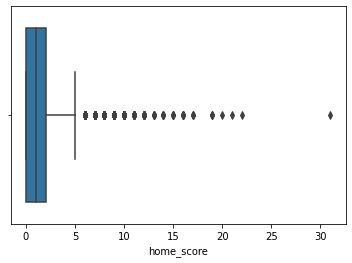

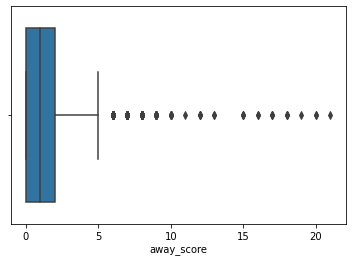

In [ ]:
#checking outliers after dropping the years before 1993 and after 2018
nresults_col=(tresults[['home_score','away_score']])

for column in nresults_col:
  plt.figure()
  sns.boxplot(x=nresults_col[column])

###**Data comparisons of both datasets**

In [ ]:
# Check whether each column has an appropriate datatype for the fifa_ranking dataset
ranking.info()
print('')
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57756 non-null  int64  
 1   country_full             57756 non-null  object 
 2   country_abrv             57756 non-null  object 
 3   total_points             57756 non-null  float64
 4   previous_points          57756 non-null  int64  
 5   rank_change              57756 non-null  int64  
 6   cur_year_avg             57756 non-null  float64
 7   cur_year_avg_weighted    57756 non-null  float64
 8   last_year_avg            57756 non-null  float64
 9   last_year_avg_weighted   57756 non-null  float64
 10  two_year_ago_avg         57756 non-null  float64
 11  two_year_ago_weighted    57756 non-null  float64
 12  three_year_ago_avg       57756 non-null  float64
 13  three_year_ago_weighted  57756 non-null  float64
 14  confederation         

* In the Ranking dataset rank_date needs to be changed to be of type datetime

In [ ]:
# Changing the Dtype of the rank_date column
ranking["rank_date"]= pd.to_datetime(ranking["rank_date"])
ranking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57756 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57756 non-null  int64         
 1   country_full             57756 non-null  object        
 2   country_abrv             57756 non-null  object        
 3   total_points             57756 non-null  float64       
 4   previous_points          57756 non-null  int64         
 5   rank_change              57756 non-null  int64         
 6   cur_year_avg             57756 non-null  float64       
 7   cur_year_avg_weighted    57756 non-null  float64       
 8   last_year_avg            57756 non-null  float64       
 9   last_year_avg_weighted   57756 non-null  float64       
 10  two_year_ago_avg         57756 non-null  float64       
 11  two_year_ago_weighted    57756 non-null  float64       
 12  three_year_ago_avg       57756 n

In [ ]:
# Changing the Dtype of the date column in the results dataset
results["date"]= pd.to_datetime(results["date"])
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [ ]:
# Comparing common columns that are common
ranking.country_full.unique()[:50]

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe'], dtype=object)

In [ ]:
# Comparing common columns that are common
results.country.unique()[:50]

array(['Scotland', 'England', 'Wales', 'Republic of Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Bohemia', 'Switzerland',
       'Sweden', 'Germany', 'Italy', 'Chile', 'Norway', 'Finland',
       'Luxembourg', 'Russia', 'Denmark', 'Spain', 'Japan', 'Brazil',
       'Paraguay', 'China PR', 'Canada', 'Estonia', 'Guatemala',
       'Czechoslovakia', 'Poland', 'Yugoslavia', 'New Zealand', 'Romania',
       'Latvia', 'Portugal', 'Northern Ireland', 'Australia', 'Lithuania',
       'Turkey', 'Mexico', 'Aruba', 'Soviet Union', 'Haiti',
       'Philippines', 'Bulgaria', 'Jamaica', 'Kenya'], dtype=object)

* Fifa rankings will now change with each passing match as compared to the previous method of updating the rankings once every month on a particular date. 
* The points which will be deducted or added will partially be calculated by factoring in 
the strength of the two opponents.

In [ ]:
# Display the years of the fifa_rankings
#ranking.rank_date.dt.year()


The rakings in Fifa have taken place between 1993 and 2018

In [ ]:
# Drop unnecessary columns from the fifa_rakings dataset
ranking = ranking.drop(['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted',],axis=1)
print(ranking.columns)

Index(['rank', 'country_full', 'confederation', 'rank_date'], dtype='object')


In [ ]:
# Preview fifa_ranking head data
ranking.head()

,rank,country_full,confederation,rank_date
0,1,Germany,UEFA,1993-08-08
1,2,Italy,UEFA,1993-08-08
2,3,Switzerland,UEFA,1993-08-08
3,4,Sweden,UEFA,1993-08-08
4,5,Argentina,CONMEBOL,1993-08-08


In [ ]:
# Preview results head
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


* In the final merged dataset, we need ranks of both the home team and the away team.
* We will drop the city and the country that each game was played from the results dataframe.
* The column neutral will determine whether the game was in a neutral ground or not

In [ ]:
# Dropping the unnecessary columns from the results data frame
results = results.drop(['city'], axis=1)
print(results.columns)

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral'],
      dtype='object')


In [ ]:
# Preview the results head data
results.head()

,date,home_team,away_team,home_score,away_score,tournament,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False


In [ ]:
# Exploring the confederation from the fifa_ranking dataset
# And the tournament from the results dataset
print('FIFA_RANKING DATASET')
print(ranking.confederation.unique())
print('\nRESULT DATASET')
print(results.tournament.unique())

FIFA_RANKING DATASET
['UEFA' 'CONMEBOL' 'CONCACAF' 'CAF' 'AFC' 'OFC']

RESULT DATASET
['Friendly' 'British Championship' 'Copa Lipton' 'Copa Newton'
 'Copa Premio Honor Argentino' 'Copa Premio Honor Uruguayo' 'Copa Roca'
 'Copa América' 'Copa Chevallier Boutell' 'Nordic Championship'
 'International Cup' 'Baltic Cup' 'Balkan Cup' 'FIFA World Cup'
 'Copa Rio Branco' 'FIFA World Cup qualification' 'CCCF Championship'
 'NAFU Championship' 'Copa Oswaldo Cruz' 'Pan American Championship'
 'Copa del Pacífico' "Copa Bernardo O'Higgins"
 'AFC Asian Cup qualification' 'Atlantic Cup' 'AFC Asian Cup'
 'African Cup of Nations' 'Copa Paz del Chaco' 'Merdeka Tournament'
 'UEFA Euro qualification' 'UEFA Euro' 'Windward Islands Tournament'
 'African Cup of Nations qualification' 'Vietnam Independence Cup'
 'Copa Carlos Dittborn' 'CONCACAF Championship' 'Copa Juan Pinto Durán'
 'UAFA Cup' 'South Pacific Games' 'CONCACAF Championship qualification'
 'Copa Artigas' 'GaNEFo' "King's Cup" 'Gulf Cup' 'Indon

From our observations we can see that FIFA only considers these types of rankings.
* UEFA - Union of European Football Association
* CONMEBOL - The South American Football Confederation
* CONCACAF - Confederation of North, Central America and Carribean Association Footbal
* CAF - Confederation of African Football
* AFC - Asian Football Confederation
* OFC - Oceania Football Confederation
We shall match up these championships with those in our results dataset

## **Merging the datasets**

In [ ]:
# Previewing the columns in each case
print(ranking.columns)
print('')
print(results.columns) 

Index(['rank', 'country_full', 'confederation', 'rank_date'], dtype='object')

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'country', 'neutral'],
      dtype='object')


In [ ]:
tresults["date"]= pd.to_datetime(tresults["date"])
tresults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21906 entries, 17914 to 39819
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        21906 non-null  datetime64[ns]
 1   home_team   21906 non-null  object        
 2   away_team   21906 non-null  object        
 3   home_score  21906 non-null  int64         
 4   away_score  21906 non-null  int64         
 5   tournament  21906 non-null  object        
 6   city        21906 non-null  object        
 7   country     21906 non-null  object        
 8   neutral     21906 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 1.5+ MB


<ipython-input-35-bf9de430a0f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tresults["date"]= pd.to_datetime(tresults["date"])


In [ ]:
# Lets merge the two datasets.
home_merge = pd.merge(tresults, ranking, how = 'inner' , 
                      right_on =['rank_date', 'country_full'], left_on = ['date', 'home_team'])
home_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,confederation,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,Brazil,CONMEBOL,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,Paraguay,CONMEBOL,1993-08-08


In [ ]:
matches = pd.merge(home_merge, ranking, how = 'inner' , right_on =['rank_date', 'country_full'],
                   left_on = ['date', 'away_team'])
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_x,country_full_x,confederation_x,rank_date_x,rank_y,country_full_y,confederation_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,CONMEBOL,1993-08-08,22,Uruguay,CONMEBOL,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,Brazil,CONMEBOL,1993-08-08,14,Mexico,CONCACAF,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,CONMEBOL,1993-08-08,94,Venezuela,CONMEBOL,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,CAF,1993-08-08,86,Sierra Leone,CAF,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,Paraguay,CONMEBOL,1993-08-08,5,Argentina,CONMEBOL,1993-08-08


In [ ]:
# lets dsiplay the merged dataset of the away_team
matches.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_x,country_full_x,confederation_x,rank_date_x,rank_y,country_full_y,confederation_y,rank_date_y
861,2017-06-01,Mexico,Republic of Ireland,3,1,Friendly,East Rutherford,United States,True,17,Mexico,CONCACAF,2017-06-01,26,Republic of Ireland,UEFA,2017-06-01
862,2017-06-01,Nigeria,Togo,3,0,Friendly,Saint-Leu-la-Forêt,France,True,38,Nigeria,CAF,2017-06-01,112,Togo,CAF,2017-06-01
863,2017-06-01,Switzerland,Belarus,1,0,Friendly,Neuchâtel,Switzerland,False,9,Switzerland,UEFA,2017-06-01,83,Belarus,UEFA,2017-06-01
864,2017-07-06,Grenada,Barbados,0,2,Windward Islands Tournament,St. George's,Grenada,False,163,Grenada,CONCACAF,2017-07-06,181,Barbados,CONCACAF,2017-07-06
865,2018-01-18,Uganda,Namibia,0,1,African Nations Championship,Marrakech,Morocco,True,73,Uganda,CAF,2018-01-18,111,Namibia,CAF,2018-01-18


In [ ]:
# Drop the unecessary columns
matches = matches.drop(['country_full_x', 'country_full_y','rank_date_x', 'rank_date_y'], axis=1 )
print(matches.columns)

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_x', 'confederation_x',
       'rank_y', 'confederation_y'],
      dtype='object')


In [ ]:
# Rename the rank_x and rank_y columns
# Display the updated dataset
matches.rename(columns={'rank_x': 'home_rank', 'rank_y': 'away_rank', 'confederation_x':'confederation_home', 'confederation_y':'confederation_away'},inplace=True)
matches.columns
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,confederation_home,away_rank,confederation_away
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,CONMEBOL,22,CONMEBOL
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,CONMEBOL,14,CONCACAF
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,CONMEBOL,94,CONMEBOL
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,CAF,86,CAF
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,CONMEBOL,5,CONMEBOL


In [ ]:
matches.columns


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'home_rank',
       'confederation_home', 'away_rank', 'confederation_away'],
      dtype='object')

In [ ]:
# Check for null values and drop them if necessary
matches.isnull().any()

date                  False
home_team             False
away_team             False
home_score            False
away_score            False
tournament            False
city                  False
country               False
neutral               False
home_rank             False
confederation_home    False
away_rank             False
confederation_away    False
dtype: bool

*RESULT*: No nulll values



In [ ]:
# Check for duplicates in the datasets 
matches.duplicated().sum()

0

*There are no dulicates in our merged dataset*

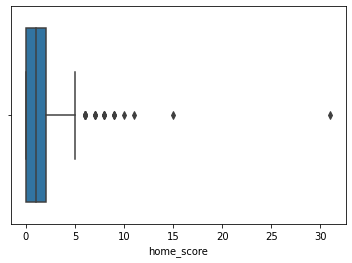

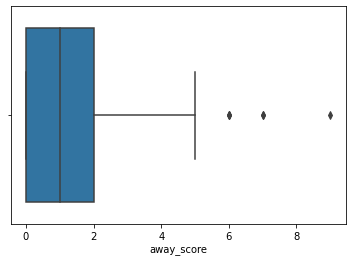

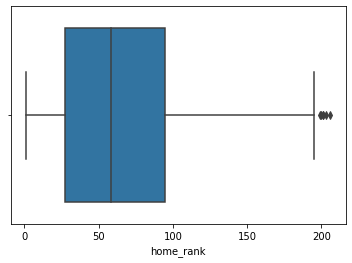

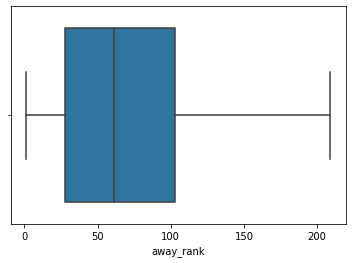

In [ ]:
# Lets plot boxplots and check for outliers for the matches columns.
m_col=(matches[['home_score', 'away_score','home_rank', 'away_rank']])

for column in m_col:
  plt.figure()
  sns.boxplot(x=m_col[column])

In [ ]:
m_col.shape

(866, 4)

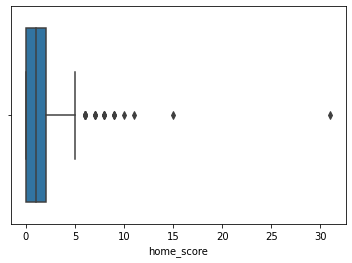

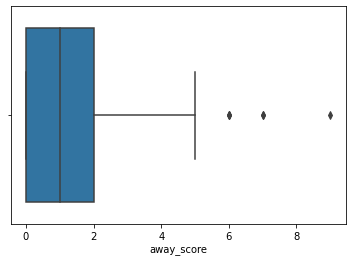

In [ ]:
m_col=(matches[['home_score', 'away_score']])

for column in m_col:
  plt.figure()
  sns.boxplot(x=m_col[column])

In [ ]:
# Dropping the Outliers in our dataset
tmatches= matches.loc[(matches["home_score"] <= 5) & (matches["away_score"] <= 5)]
tmatches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,confederation_home,away_rank,confederation_away
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,CONMEBOL,22,CONMEBOL
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,CONMEBOL,14,CONCACAF
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,CONMEBOL,94,CONMEBOL
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,CAF,86,CAF
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,CONMEBOL,5,CONMEBOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2017-06-01,Mexico,Republic of Ireland,3,1,Friendly,East Rutherford,United States,True,17,CONCACAF,26,UEFA
862,2017-06-01,Nigeria,Togo,3,0,Friendly,Saint-Leu-la-Forêt,France,True,38,CAF,112,CAF
863,2017-06-01,Switzerland,Belarus,1,0,Friendly,Neuchâtel,Switzerland,False,9,UEFA,83,UEFA
864,2017-07-06,Grenada,Barbados,0,2,Windward Islands Tournament,St. George's,Grenada,False,163,CONCACAF,181,CONCACAF


In [ ]:
tmatches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 865
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                837 non-null    datetime64[ns]
 1   home_team           837 non-null    object        
 2   away_team           837 non-null    object        
 3   home_score          837 non-null    int64         
 4   away_score          837 non-null    int64         
 5   tournament          837 non-null    object        
 6   city                837 non-null    object        
 7   country             837 non-null    object        
 8   neutral             837 non-null    bool          
 9   home_rank           837 non-null    int64         
 10  confederation_home  837 non-null    object        
 11  away_rank           837 non-null    int64         
 12  confederation_away  837 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(4), object(7)

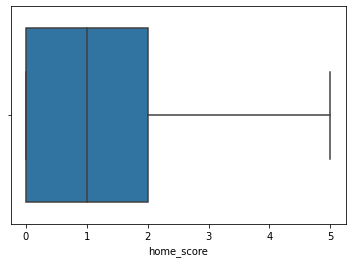

In [ ]:
sns.boxplot(x=tmatches['home_score'])

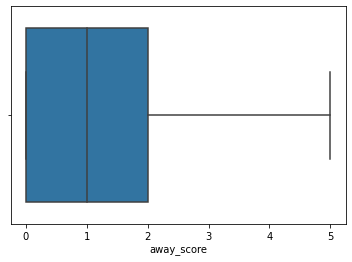

In [ ]:
sns.boxplot(x=tmatches['away_score'])
plt.show()

# Exploratory Data Analysis

## Categorical Variables

In [ ]:
#Display the total number of home teams 
print('The total number of home teams is ' +str(tmatches['home_team'].nunique()))

#Display the total number of away teams
print('The total number of away teams is ' +str(tmatches['away_team'].nunique()))

The total number of home teams is 121
The total number of away teams is 130


In [ ]:
# Frequency Tables
country = tmatches.country.value_counts()
print("The frequency table of countries is: \n", country)
print("\n")

tournament = tmatches.tournament.value_counts()
print("The frequency table of the confederations is: \n", tournament)
print("\n")

home = tmatches.home_team.value_counts()
print("The frequency table of home teams: \n", home)
print("\n")

away = tmatches.away_team.value_counts()
print("The frequency table of the away teams: \n", away)
print("\n")

tournament = tmatches.tournament.value_counts()
print("The frequency table of the type of tournament: \n", tournament)
print("\n")

neutral = tmatches.neutral.value_counts()
print("The frequency table of the neutral venues: \n", neutral)

The frequency table of countries is: 
 United States    17
Cyprus           12
Greece           11
Saudi Arabia     10
Portugal         10
                 ..
Macau             1
Togo              1
South Korea       1
Egypt             1
Hong Kong         1
Name: country, Length: 117, dtype: int64


The frequency table of the confederations is: 
 Friendly                                      290
FIFA World Cup qualification                   97
UEFA Euro qualification                        16
AFC Asian Cup qualification                     8
Cyprus International Tournament                 6
Copa América                                    5
African Cup of Nations                          4
United Arab Emirates Friendship Tournament      3
Malta International Tournament                  3
Gulf Cup                                        3
King's Cup                                      2
Prime Minister's Cup                            2
SAFF Cup                                        2


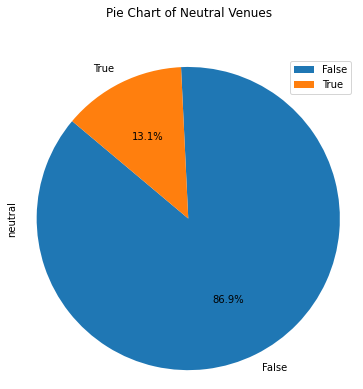

In [ ]:
# Pie chart of the matches played in neutral venues
tmatches['neutral'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Pie Chart of Neutral Venues', y=1.1)
plt.show()

## Numerical Variables

### Measures of Central Tendency

In [ ]:
# Mean 
home_mean = tmatches['home_score'].mean()
print("The average home score is: ", home_mean)
print('\n')

away_mean = tmatches['away_score'].mean()
print("The average away score is: ", away_mean)
print('\n')


The average home score is:  1.4835886214442013


The average away score is:  0.962800875273523




In [ ]:
# Median
home_median = tmatches['home_score'].median()
print("The median of the home score is: ", home_median)
print('\n')

away_median = tmatches['away_score'].median()
print("The median of the away score is: ", away_median)
print('\n')

The median of the home score is:  1.0


The median of the away score is:  1.0




### Measures of Dispersion

In [ ]:
# Standard Deviation
tmatches.std()

<ipython-input-56-83c93347e0ab>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tmatches.std()


date          1096 days 15:34:39.876755248
home_score                        1.301254
away_score                        1.072347
neutral                           0.338088
home_rank                        41.042257
away_rank                        44.013181
dtype: object

In [ ]:
# Variance
tmatches.var()

<ipython-input-57-3288b65f54b2>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tmatches.var()


home_score       1.693261
away_score       1.149929
neutral          0.114304
home_rank     1684.466841
away_rank     1937.160093
dtype: float64

In [ ]:
# Quantiles
tmatches[['home_score','away_score']].quantile([0.25,0.50,0.75])

,home_score,away_score
0.25,0.0,0.0
0.50,1.0,1.0
0.75,2.0,2.0


In [ ]:
# Range
max = tmatches[['home_score','away_score']].max()
min = tmatches[['home_score','away_score']].min()
range = max - min
print("The range within the fifa results is: \n", range)

The range within the fifa results is: 
 home_score    5
away_score    5
dtype: int64


In [ ]:
# Kurtosis
home_kurt = tmatches['home_score'].kurt()
print("The kurtosis of the home score is: \n", home_kurt)

if home_kurt > 0:
  print("The home score is leptokurtic")
elif home_kurt < 0:
  print("The home score is platykurtic")
else:
  print("The home score is mesokurtic")
print('\n') 

away_kurt = tmatches['away_score'].kurt()
print("The kurtosis of the away score is: \n", away_kurt)

if away_kurt > 0:
  print("The away score column is leptokurtic")
elif away_kurt < 0:
  print("The away score is platykurtic")
else:
  print("The away score is mesokurtic")
print('\n')

The kurtosis of the home score is: 
 0.2528915690934652
The home score is leptokurtic


The kurtosis of the away score is: 
 1.1021298828787867
The away score column is leptokurtic




In [ ]:
# Skewness
home_skew = tmatches['home_score'].skew()
print("The skewness of the home score is: \n", home_skew)
if home_skew == 0:
  print("The distribution is symmetrical")
elif home_skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

away_skew = tmatches['away_score'].skew()
print("The skewness of the away score is: \n", away_skew)
if away_skew == 0:
  print("The distribution is symmetrical")
elif away_skew > 0:
  print("The distribution is positively skewed")
else:
  print("The distribution is negatively skewed")
print('\n')

The skewness of the home score is: 
 0.8308630163886059
The distribution is positively skewed


The skewness of the away score is: 
 1.1566476723773365
The distribution is positively skewed




/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


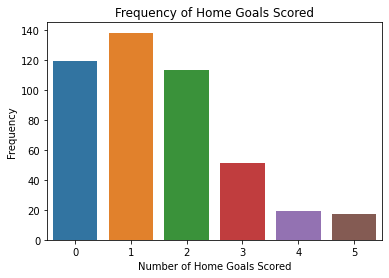

In [ ]:
# visualize the home scores using a countplot
#plt.hist(tmatches['home_score'], bins= [0,1,2,3,4,5,6,7], rwidth = 4, color ='grey')
sns.countplot(tmatches.home_score)

# Labelling our x axis
plt.xlabel("Number of Home Goals Scored")

# Labelling our y axis
plt.ylabel("Frequency")

# Giving a title to our Bar chart
plt.title("Frequency of Home Goals Scored")

# Displaying our chart
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


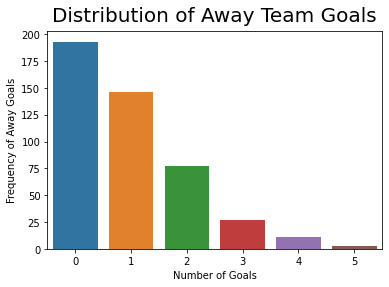

In [ ]:
# visualize the home scores using a countplot
# plot the count plot

sns.countplot(tmatches.away_score)

# label the chart
plt.title('Distribution of Away Team Goals', fontsize=20, y=1.018)
# label the x axis
plt.xlabel('Number of Goals')
# label the y axis
plt.ylabel('Frequency of Away Goals')
# display the chart
plt.show()

 ## Bivariate Data Analysis

###Numerical and Numerical Values

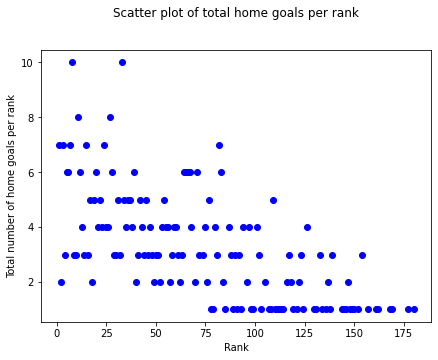

In [ ]:
# Scatter plot between the rank and the home goals scored
homerank=tmatches.groupby('home_rank')['home_score'].count().reset_index(name='total number of home goals per rank')
plt.figure(figsize=(7,5))
plt.scatter(homerank['home_rank'] , homerank["total number of home goals per rank"], color='blue')
plt.xlabel("Rank")
plt.ylabel("Total number of home goals per rank")
plt.title("Scatter plot of total home goals per rank", y=1.1)
plt.show()

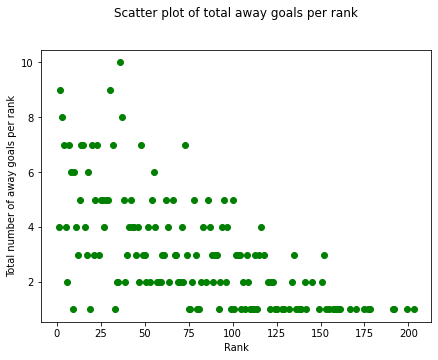

In [ ]:
# Scatter plot between the rank and the number of away goals scored
awayrank=tmatches.groupby('away_rank')['away_score'].count().reset_index(name='total number of away goals per rank')
plt.figure(figsize=(7,5))
plt.scatter(awayrank['away_rank'] , awayrank["total number of away goals per rank"], color = 'green')
plt.xlabel("Rank")
plt.ylabel("Total number of away goals per rank")
plt.title("Scatter plot of total away goals per rank", y=1.1)
plt.show()

##Correlation matrix

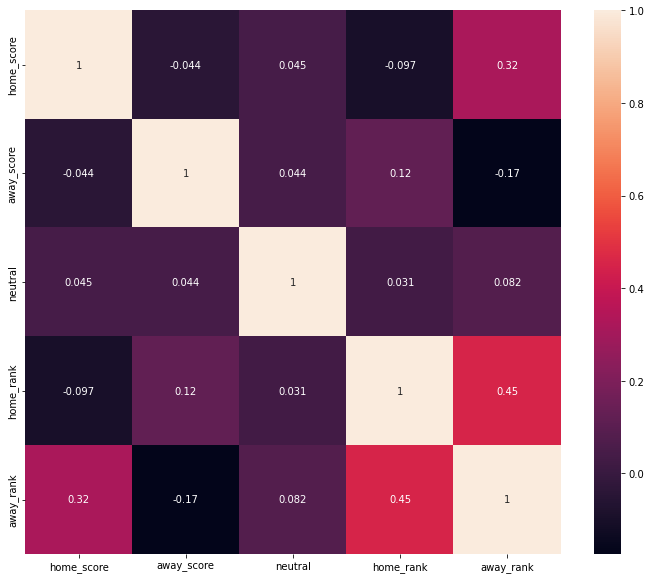

In [ ]:
# Visualization using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(tmatches.corr(), annot=True)
plt.show()

In [ ]:
# Importing libraries
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error , accuracy_score , confusion_matrix
from sklearn.model_selection import GridSearchCV , KFold , StratifiedKFold , cross_val_score
from sklearn.pipeline import Pipeline
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
tmatches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 865
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                837 non-null    datetime64[ns]
 1   home_team           837 non-null    object        
 2   away_team           837 non-null    object        
 3   home_score          837 non-null    int64         
 4   away_score          837 non-null    int64         
 5   tournament          837 non-null    object        
 6   city                837 non-null    object        
 7   country             837 non-null    object        
 8   neutral             837 non-null    bool          
 9   home_rank           837 non-null    int64         
 10  confederation_home  837 non-null    object        
 11  away_rank           837 non-null    int64         
 12  confederation_away  837 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(4), object(7)


These features are categorical in nature; therefore, it is unlikely that polynomial regression models will do well in accomplishing the objective of predicting the home teams' and away teams' scores, but we will use them as numerical data just to see how the model will fair

# Feature selection and engineering

###Feature selection

In [ ]:
matches_copy = tmatches.copy(deep=True)

### Feature engineering

In [ ]:
# check how the values have been transformed by comparing with the uncoded values in the original dataset
print(matches.tournament.value_counts())
print(matches_copy.tournament.value_counts())

Friendly                                      570
FIFA World Cup qualification                  134
UEFA Euro qualification                        37
AFC Asian Cup qualification                    31
Cyprus International Tournament                 8
AFF Championship                                7
Gulf Cup                                        7
Copa América                                    6
CECAFA Cup                                      6
Gold Cup                                        5
African Cup of Nations qualification            5
African Cup of Nations                          4
AFC Asian Cup                                   4
SAFF Cup                                        4
United Arab Emirates Friendship Tournament      3
African Nations Championship                    3
King's Cup                                      3
Malta International Tournament                  3
Oceania Nations Cup                             2
Confederations Cup                              2


We will use polynomial regression to create a model that predicts the results of a home team and another model that predicts the results of an away team based on the home team's rank, away team's rank and the tournament's type.

In [ ]:
# Generating a status column
# Creating a list to display the conditions of the match from the home team's perspective(Win, Lose, DrawS) 
conditions = [
    (matches_copy['home_score'] > matches_copy['away_score']),
    (matches_copy['home_score'] < matches_copy['away_score']),
    (matches_copy['home_score'] == matches_copy['away_score'])
    ]

# Create a list of the status we want to assign for each condition
status = ['Win', 'Lose', 'Draw']

# Create a new column and use np.select to assign values to it using our lists as arguments
matches_copy ['status'] = np.select(conditions, status)    

In [ ]:
# Genearting a column that tells us whether the tournament was a friendly or not
def tournament(t):
    if t == 'Friendly':
        return 'Friendly'
    else:
        return 'Not Friendly'
      
matches_copy['tournament_type'] = matches_copy.tournament.apply(lambda i: tournament(i))

In [ ]:
matches_copy.head(7)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,confederation_home,away_rank,confederation_away,status,tournament_type
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,CONMEBOL,22,CONMEBOL,Win,Not Friendly
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,CONMEBOL,14,CONCACAF,Draw,Friendly
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,CONMEBOL,94,CONMEBOL,Win,Not Friendly
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,CAF,86,CAF,Win,Friendly
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,CONMEBOL,5,CONMEBOL,Lose,Not Friendly
5,1993-08-08,Peru,Colombia,0,1,FIFA World Cup qualification,Lima,Peru,False,70,CONMEBOL,19,CONMEBOL,Lose,Not Friendly
6,1993-09-23,Saudi Arabia,Costa Rica,1,2,Friendly,Khobar,Saudi Arabia,False,44,AFC,38,CONCACAF,Lose,Friendly


In [ ]:
# encoding the values in 'tournament' column so that they can be in 0's and 1's 
matches_copy['tournament_type'] = LabelEncoder().fit_transform(matches_copy['tournament_type'].astype(str))

In [ ]:
matches_copy.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,confederation_home,away_rank,confederation_away,status,tournament_type
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,CONMEBOL,22,CONMEBOL,Win,1
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,CONMEBOL,14,CONCACAF,Draw,0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,CONMEBOL,94,CONMEBOL,Win,1
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,CAF,86,CAF,Win,0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,CONMEBOL,5,CONMEBOL,Lose,1


In [ ]:
# Previewing the dataset after adding the new features
matches_copy

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_rank,confederation_home,away_rank,confederation_away,status,tournament_type
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,CONMEBOL,22,CONMEBOL,Win,1
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,CONMEBOL,14,CONCACAF,Draw,0
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,CONMEBOL,94,CONMEBOL,Win,1
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,CAF,86,CAF,Win,0
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,CONMEBOL,5,CONMEBOL,Lose,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2017-06-01,Mexico,Republic of Ireland,3,1,Friendly,East Rutherford,United States,True,17,CONCACAF,26,UEFA,Win,0
862,2017-06-01,Nigeria,Togo,3,0,Friendly,Saint-Leu-la-Forêt,France,True,38,CAF,112,CAF,Win,0
863,2017-06-01,Switzerland,Belarus,1,0,Friendly,Neuchâtel,Switzerland,False,9,UEFA,83,UEFA,Win,0
864,2017-07-06,Grenada,Barbados,0,2,Windward Islands Tournament,St. George's,Grenada,False,163,CONCACAF,181,CONCACAF,Lose,1


# Multicollinearity

In [ ]:
# lets put all the independent variables in one subset
independent_variables = matches_copy[['tournament_type', 'home_rank', 'away_rank']]
independent_variables

,tournament_type,home_rank,away_rank
0,1,59,22
1,0,8,14
2,1,35,94
3,0,65,86
4,1,67,5
...,...,...,...
861,0,17,26
862,0,38,112
863,0,9,83
864,1,163,181


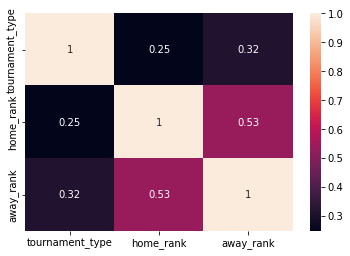

In [ ]:
# Correlation 
correlation = independent_variables.corr()

# Visualizing the correlation using a heatmap
sns.heatmap(independent_variables.corr(), annot=True)
plt.show()

According to the pearson correlation values, none of the variables is strongly correlated to another. We will use the correlations above to compute each variance inflation factors to check for multicollinearity.

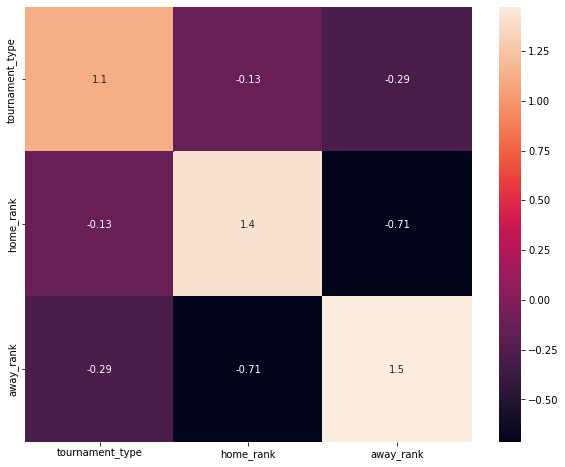

In [ ]:
# Checking for collinearity using the VIF (Variation Inflation Factor)
VIF = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# Visualize the VIF using a heatmap
plt.subplots(figsize =  (10,8))
sns.heatmap(VIF, annot = True)
plt.show()

The VIF scores show that all the variables are not correlated to each other.

# Polynomial Regression

## Model One : Predicting the home team score

# Cross Validation

In [ ]:
# Preparing the Data
# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = matches_copy[["home_rank","away_rank","tournament_type"]].values
y = matches_copy["home_score"].values

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

 Let's now cross validate our model by using k-fold cross validation. We will use 10 folds 

In [ ]:
from sklearn.model_selection import KFold

# We will use the same 3 independent variables for this
folds = KFold(n_splits=10)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.263599476785352

Training model 2
Model 2 Root Mean Squared Error: 1.3059554908082787

Training model 3
Model 3 Root Mean Squared Error: 1.196497295741805

Training model 4
Model 4 Root Mean Squared Error: 1.0221878874588601

Training model 5
Model 5 Root Mean Squared Error: 1.15979055373991

Training model 6
Model 6 Root Mean Squared Error: 1.1527699538057363

Training model 7
Model 7 Root Mean Squared Error: 1.0731862682742817

Training model 8
Model 8 Root Mean Squared Error: 1.1555258341156238

Training model 9
Model 9 Root Mean Squared Error: 1.0930027538078846

Training model 10
Model 10 Root Mean Squared Error: 1.284381423917416


In [ ]:
np.mean(RMSES)

1.170689693845515

In this case we would pick model 4 since it offers the least RMSE.

Using leave one out cross validation. Each observation is a test data while the rest of the observations are train data for each run hence the 837 models.

In [ ]:
from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 837 folds
trained 837 models


0.9357220929917337

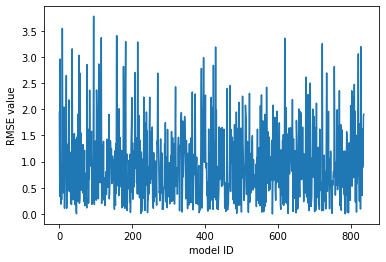

In [ ]:
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

Visual representation of the RMSE of the different models under Leave one out Model Evaluation

The first model will be for predicting the number of goals a home team scores based on the home team's rank, away team's rank and the tournament's type

In [ ]:
#define our polynomial model, with whatever degree we want

degree=6

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_train = poly_model.fit_transform(X_train)
print(f'initial values {X_train[0]}\n Mapped to {poly_x_train[0]}')


initial values [59 22  1]
 Mapped to [1.00000000e+00 5.90000000e+01 2.20000000e+01 1.00000000e+00
 3.48100000e+03 1.29800000e+03 5.90000000e+01 4.84000000e+02
 2.20000000e+01 1.00000000e+00 2.05379000e+05 7.65820000e+04
 3.48100000e+03 2.85560000e+04 1.29800000e+03 5.90000000e+01
 1.06480000e+04 4.84000000e+02 2.20000000e+01 1.00000000e+00
 1.21173610e+07 4.51833800e+06 2.05379000e+05 1.68480400e+06
 7.65820000e+04 3.48100000e+03 6.28232000e+05 2.85560000e+04
 1.29800000e+03 5.90000000e+01 2.34256000e+05 1.06480000e+04
 4.84000000e+02 2.20000000e+01 1.00000000e+00 7.14924299e+08
 2.66581942e+08 1.21173610e+07 9.94034360e+07 4.51833800e+06
 2.05379000e+05 3.70656880e+07 1.68480400e+06 7.65820000e+04
 3.48100000e+03 1.38211040e+07 6.28232000e+05 2.85560000e+04
 1.29800000e+03 5.90000000e+01 5.15363200e+06 2.34256000e+05
 1.06480000e+04 4.84000000e+02 2.20000000e+01 1.00000000e+00
 4.21805336e+10 1.57283346e+10 7.14924299e+08 5.86480272e+09
 2.66581942e+08 1.21173610e+07 2.18687559e+09 9.

In [ ]:
# transform out polynomial features for X test
poly_x_test = poly_model.fit_transform(X_test)

In [ ]:

# let's fit the model
poly_model.fit(poly_x_train, y_train)

# we use linear regression as a base
regression_model = LinearRegression()

regression_model.fit(poly_x_train,y_train)

y_pred = regression_model.predict(poly_x_test)

regression_model.coef_

mean_squared_error(y_test, y_pred, squared=False)


1.3594276509899164

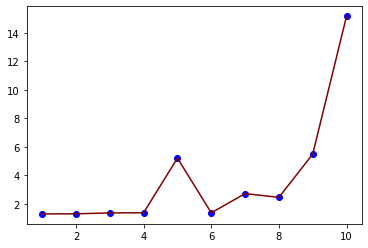

In [ ]:
number_degrees = [1,2,3,4,5,6,7,8,9,10]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   #poly_x_values = poly_model.fit_transform(X_train)
   poly_x_train = poly_model.fit_transform(X_train)
   poly_model.fit(poly_x_train,y_train)
   
   poly_x_test = poly_model.fit_transform(X_test)
   
   regression_model = LinearRegression()
   regression_model.fit(poly_x_train,y_train)
   y_pred = regression_model.predict(poly_x_test)
  
   plt_mean_squared_error.append(mean_squared_error(y_test, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="blue")
plt.plot(number_degrees,plt_mean_squared_error, color="maroon")

From above, we see our model did best when our degree=1 to help us predict the home score most accurately.

## Model 2: Predicting the away score

The second model will be for predicting the number of goals an away team scores based on the home rank, away rank and the tournament's type

In [ ]:
# Preparing the Data
# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = matches_copy[["home_rank","away_rank","tournament_type"]].values
y = matches_copy["home_score"].values  

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

### Cross validation

In [ ]:
from sklearn.model_selection import KFold

# We will use the same 3 independent variables for this
folds = KFold(n_splits=10)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.263599476785352

Training model 2
Model 2 Root Mean Squared Error: 1.3059554908082787

Training model 3
Model 3 Root Mean Squared Error: 1.196497295741805

Training model 4
Model 4 Root Mean Squared Error: 1.0221878874588601

Training model 5
Model 5 Root Mean Squared Error: 1.15979055373991

Training model 6
Model 6 Root Mean Squared Error: 1.1527699538057363

Training model 7
Model 7 Root Mean Squared Error: 1.0731862682742817

Training model 8
Model 8 Root Mean Squared Error: 1.1555258341156238

Training model 9
Model 9 Root Mean Squared Error: 1.0930027538078846

Training model 10
Model 10 Root Mean Squared Error: 1.284381423917416


In this case we would pick model 4 since it offers the least RMSE.

In [ ]:
from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 837 folds
trained 837 models


0.9357220929917337

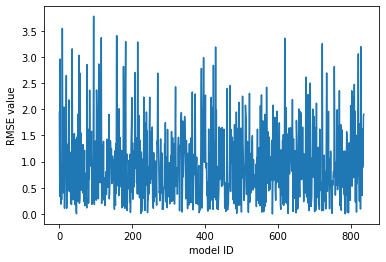

In [ ]:
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

Visual representation of the RMSE of the different models under Leave one out Model Evaluation

In [ ]:
#define our polynomial model, with whatever degree we want

degree=7

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations 
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_train = poly_model.fit_transform(X_train)
print(f'initial values {X_train[0]}\n Mapped to {poly_x_train[0]}')

initial values [59 22  1]
 Mapped to [1.00000000e+00 5.90000000e+01 2.20000000e+01 1.00000000e+00
 3.48100000e+03 1.29800000e+03 5.90000000e+01 4.84000000e+02
 2.20000000e+01 1.00000000e+00 2.05379000e+05 7.65820000e+04
 3.48100000e+03 2.85560000e+04 1.29800000e+03 5.90000000e+01
 1.06480000e+04 4.84000000e+02 2.20000000e+01 1.00000000e+00
 1.21173610e+07 4.51833800e+06 2.05379000e+05 1.68480400e+06
 7.65820000e+04 3.48100000e+03 6.28232000e+05 2.85560000e+04
 1.29800000e+03 5.90000000e+01 2.34256000e+05 1.06480000e+04
 4.84000000e+02 2.20000000e+01 1.00000000e+00 7.14924299e+08
 2.66581942e+08 1.21173610e+07 9.94034360e+07 4.51833800e+06
 2.05379000e+05 3.70656880e+07 1.68480400e+06 7.65820000e+04
 3.48100000e+03 1.38211040e+07 6.28232000e+05 2.85560000e+04
 1.29800000e+03 5.90000000e+01 5.15363200e+06 2.34256000e+05
 1.06480000e+04 4.84000000e+02 2.20000000e+01 1.00000000e+00
 4.21805336e+10 1.57283346e+10 7.14924299e+08 5.86480272e+09
 2.66581942e+08 1.21173610e+07 2.18687559e+09 9.

In [ ]:
poly_x_test = poly_model.fit_transform(X_test)

In [ ]:
# let's fit the model
poly_model.fit(poly_x_train, y_train)

# we use linear regression as a base
regression_model = LinearRegression()

regression_model.fit(poly_x_train,y_train)

y_pred = regression_model.predict(poly_x_test)

regression_model.coef_

mean_squared_error(y_test, y_pred, squared=False)

1.243646751727497

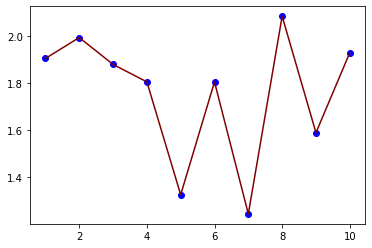

In [ ]:
number_degrees = [1,2,3,4,5,6,7,8,9,10]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   #poly_x_values = poly_model.fit_transform(X_train)
   poly_x_train = poly_model.fit_transform(X_train)
   poly_model.fit(poly_x_train,y_train)
   
   poly_x_test = poly_model.fit_transform(X_test)
   
   regression_model = LinearRegression()
   regression_model.fit(poly_x_train,y_train)
   y_pred = regression_model.predict(poly_x_test)
  
   plt_mean_squared_error.append(mean_squared_error(y_test, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="blue")
plt.plot(number_degrees,plt_mean_squared_error, color="maroon")

From above, we see our model did best when our degree=7 to help us predict the away score most accurately.

# Logistic Regression

Model : Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [ ]:
# Preparing the Data
# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = matches_copy[["home_team","away_team","away_score","home_rank","away_rank","tournament_type"]]
Y = matches_copy["home_score"]

In [ ]:
# Encoding the categorical variables using the get dummies function
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 30)

In [ ]:
# Introducing logistic regression to our dataset
logistic = LogisticRegression()

# Fit and transform the train sets
logistic.fit(X_train, y_train)

# Making predictions using the logistic model
y_pred = logistic.predict(X_test)

In [ ]:
# Measuring the accuracy of the model using the accuracy_score function
print("The accuracy of the model is", {accuracy_score(y_test, y_pred)})

In [105]:
# use accuracy_score function to compute the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred)

# print the accuracy value
print('Accuracy: ', accuracy1)

print("")

Accuracy:  0.3115942028985507



The accuracy test shows that our algorithm is approximately 31.15% accurate in predicting the match status of the home team.

# Conclusion,
Our Model in Polynomial approach did best when our degree is 1  for home score and  when our degree is 7  for away score .
Cross Validation model number 4 is the best for predicting our home score and away score.
The Logistic approach regression the accuracy test shows that our algorithm is approximately 31.15% accurate in predicting the match status of the home team.


# Recommendation.
The first solution brought almost a perfect model which means that there could be changes that could be made. We could have maybe added the weighted points and previous points. Also, some factors such as injury on players should have been included in the dataset and players being given a red card and benched can affect the outcome of their next 2 games.